In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline

In [32]:
data = pd.read_csv('field.csv')

In [33]:
data.head()

,women,statbook
0,28,18
1,10,16
2,21,25
3,27,18
4,24,12


In [34]:
grand_array = np.concatenate((np.array(data['women']) ,np.array(data['statbook'])))

In [35]:
grand_mean = np.mean(grand_array)
grand_mean

19.254

In [36]:
data['Mean'] = (data['women'] + data['statbook'])/2
data['adj'] = grand_mean - data['Mean']

In [37]:
data['women_adj'] = data['women'] + data['adj']
data['statbook_adj'] = data['statbook'] + data['adj']

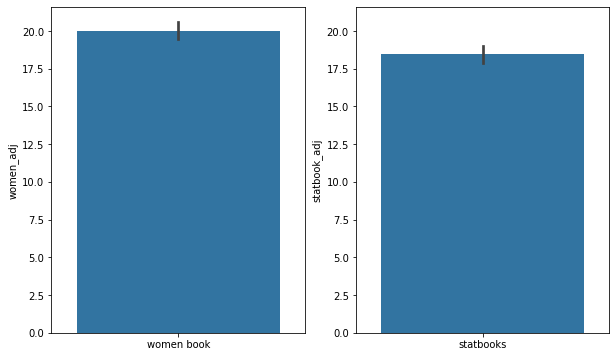

In [38]:
plt.figure(figsize=(10,6))
ax1 = plt.subplot(1,2,1)
_ = sns.barplot(x=['women book' for i in range(len(data))] , y='women_adj' , data=data)
ax2 = plt.subplot(1,2,2,sharey = ax1)
_ = sns.barplot(x=['statbooks' for i in range(len(data))] , y='statbook_adj' , data=data)

In [39]:
t, p = st.ttest_rel(data['women'], data['statbook'])
print(f'statistic = {t}, pvalue = {p}')

statistic = 2.70564850016821, pvalue = 0.007050390570181411


In [40]:
# effect size

effect_size = np.sqrt(t**2/(t**2 + 500-1))
effect_size

0.12024266827641303